### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# <font color='blue'> Project 2 : Buzz Prediction on Twitter
#### Classification task: Prediction of buzz value for Twitter-Absolute-Sigma-500.Data dataset. 




In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

###### reading dataset

In [2]:
 data=pd.read_csv("Twitter-Absolute-Sigma-500.data",
           skipinitialspace=True,header=None,names = ["NCD_0","NCD_1","NCD_2","NCD_3","NCD_4","NCD_5","NCD_6","AI_0","AI_1","AI_2","AI_3","AI_4","AI_5","AI_6","AS(NA)_0","AS(NA)_1","AS(NA)_2","AS(NA)_3","AS(NA)_4","AS(NA)_5","AS(NA)_6","BL_0","BL_1","BL_2","BL_3","BL_4","BL_5","BL_6","NAC_0","NAC_1","NAC_2","NAC_3","NAC_4","NAC_5","NAC_6","AS(NAC)_0","AS(NAC)_1","AS(NAC)_2","AS(NAC)_3","AS(NAC)_4","AS(NAC)_5","AS(NAC)_6","CS_0","CS_1","CS_2","CS_3","CS_4","CS_5","CS_6","AT_0","AT_1","AT_2","AT_3","AT_4","AT_5","AT_6","NA_0","NA_1","NA_2","NA_3","NA_4","NA_5","NA_6","ADL_0","ADL_1","ADL_2","ADL_3","ADL_4","ADL_5","ADL_6","NAD_0","NAD_1","NAD_2","NAD_3","NAD_4","NAD_5","NAD_6","BUZZ"])

In [3]:
data.shape

(140707, 78)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [5]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [6]:
data.isnull().sum().sort_values(ascending=False)

BUZZ         0
NAC_0        0
BL_0         0
BL_1         0
BL_2         0
BL_3         0
BL_4         0
BL_5         0
BL_6         0
NAC_1        0
AS(NA)_5     0
NAC_2        0
NAC_3        0
NAC_4        0
NAC_5        0
NAC_6        0
AS(NAC)_0    0
AS(NAC)_1    0
AS(NA)_6     0
AS(NA)_4     0
NAD_6        0
AI_1         0
NCD_1        0
NCD_2        0
NCD_3        0
NCD_4        0
NCD_5        0
NCD_6        0
AI_0         0
AI_2         0
            ..
ADL_3        0
ADL_5        0
AS(NAC)_5    0
ADL_6        0
NAD_0        0
NAD_1        0
NAD_2        0
NAD_3        0
NAD_4        0
NAD_5        0
NA_3         0
NA_2         0
NA_1         0
NA_0         0
AS(NAC)_6    0
CS_0         0
CS_1         0
CS_2         0
CS_3         0
CS_4         0
CS_5         0
CS_6         0
AT_0         0
AT_1         0
AT_2         0
AT_3         0
AT_4         0
AT_5         0
AT_6         0
NCD_0        0
Length: 78, dtype: int64

###### splitting into feature set and classifier

In [5]:
y=data['BUZZ']
X=data[["NCD_0","NCD_1","NCD_2","NCD_3","NCD_4","NCD_5","NCD_6","AI_0","AI_1","AI_2","AI_3","AI_4","AI_5","AI_6","AS(NA)_0","AS(NA)_1","AS(NA)_2","AS(NA)_3","AS(NA)_4","AS(NA)_5","AS(NA)_6","BL_0","BL_1","BL_2","BL_3","BL_4","BL_5","BL_6","NAC_0","NAC_1","NAC_2","NAC_3","NAC_4","NAC_5","NAC_6","AS(NAC)_0","AS(NAC)_1","AS(NAC)_2","AS(NAC)_3","AS(NAC)_4","AS(NAC)_5","AS(NAC)_6","CS_0","CS_1","CS_2","CS_3","CS_4","CS_5","CS_6","AT_0","AT_1","AT_2","AT_3","AT_4","AT_5","AT_6","NA_0","NA_1","NA_2","NA_3","NA_4","NA_5","NA_6","ADL_0","ADL_1","ADL_2","ADL_3","ADL_4","ADL_5","ADL_6","NAD_0","NAD_1","NAD_2","NAD_3","NAD_4","NAD_5","NAD_6"]]

###### The below value shows that this dataset is bias. Which means accuracy may not a be good evaluation function. For the rest of this project we consider 'AUC' as a scoring function.

In [6]:
y.sum()/y.count()

0.19739600730596205

###### splitting into test and training set. test-size=20%

In [12]:
X_train_org_full, X_test_org_full, y_train_full, y_test_full = train_test_split(X,y,test_size=.2,random_state=0)

###### creating sample dataset

In [13]:
  _, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [14]:
sample_data.shape

(14071, 77)

In [15]:
sample_target.shape

(14071,)

In [16]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target,test_size=.2,random_state=0)

###### StandardScaler removes the mean and scales the data to unit variance. This scaler cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. The outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. Therefore, we prefer using MinMaxScaler to preserve the effects of outliers.

In [20]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [19]:
sc1 = MinMaxScaler()
X_train_full = sc1.fit_transform(X_train_org_full)
X_test_full = sc1.transform(X_test_org_full)

###### using gridsearch to find best parameters for different classification models

###### knn

In [21]:
param_grid_knn = {'n_neighbors': [3,7,12,18,20,25,30,35,40,45,50]}

In [22]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, return_train_score=True,scoring='roc_auc')

In [23]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 7, 12, 18, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [26]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 50}
Best cross-validation score: 0.99


In [27]:
train_score_array = []
test_score_array = []

for k in range(1,50):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    x_axis = range(1,50)

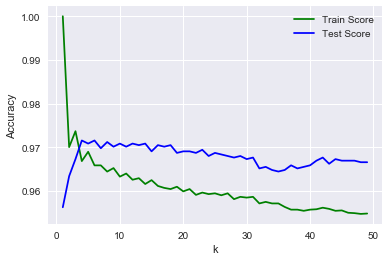

In [28]:
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [29]:
y_knn_predict = grid_search_knn.predict(X_test)
y_knn_train_predict = grid_search_knn.predict(X_train)

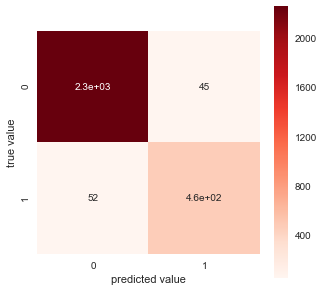

In [30]:
mat = confusion_matrix(y_test,y_knn_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [31]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.94 


In [81]:
report_table = [['knn', 'k = 50', grid_search_knn.score(X_train, y_train), grid_search_knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test), np.mean(grid_search_knn.cv_results_['mean_train_score']),np.mean(grid_search_knn.cv_results_['mean_test_score']) ]]

###### logistic regression

In [32]:
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1','l2']}

In [33]:
grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, return_train_score=True, scoring='roc_auc')

In [34]:
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [35]:
print("Best parameters: {}".format(grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logreg.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.99


In [36]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

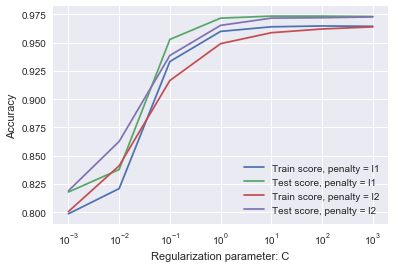

In [37]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [38]:
y_logreg_predict = grid_search_logreg.predict(X_test)
y_logreg_train_predict = grid_search_logreg.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_logreg_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_logreg_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.96 


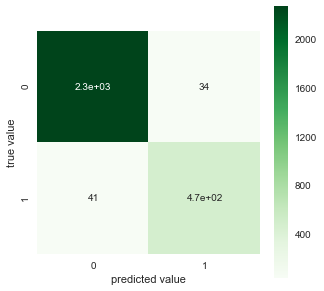

In [39]:
mat = confusion_matrix(y_test, y_logreg_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Greens')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [82]:
report_table = report_table + [['Logistic Regression', 'C = 10, penalty = l1', grid_search_logreg.score(X_train, y_train), grid_search_logreg.score(X_test, y_test), roc_auc_score(y_logreg_train_predict, y_train), roc_auc_score(y_logreg_predict, y_test),np.mean(grid_search_logreg.cv_results_['mean_train_score']),np.mean(grid_search_logreg.cv_results_['mean_test_score'])]]

###### decision tree

In [41]:
param_grid_dtree = {'criterion':['entropy','gini'],'max_depth': [3,5,8,15,20,25],'min_samples_split': [2,4,6,10],'min_samples_leaf':[2,4,6,10],'max_features':['auto','sqrt','log2'],'max_leaf_nodes': [5,10,15],
                  'min_impurity_decrease':[0.01,0.04]}

In [42]:
grid_search_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid_dtree, cv=5, return_train_score=True,scoring='roc_auc')

In [43]:
grid_search_dtree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 8, 15, 20, 25], 'min_samples_split': [2, 4, 6, 10], 'min_samples_leaf': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [5, 10, 15], 'min_impurity_decrease': [0.01, 0.04]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [44]:
print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best cross-validation score: 0.98


In [45]:
y_dtree_predict = grid_search_dtree.predict(X_test)
y_dtree_train_predict = grid_search_dtree.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_dtree_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_dtree_predict, y_test))

Train roc_auc_score: 0.92
Test roc_auc_score: 0.93 


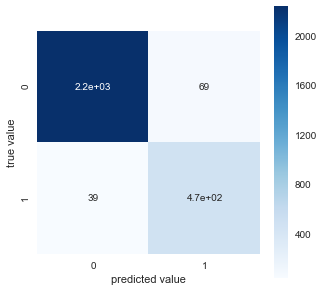

In [46]:
mat = confusion_matrix(y_test, y_dtree_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [83]:
report_table = report_table + [['Decision Tree', 'criterion= entropy, max_depth= 8, max_features= auto, max_leaf_nodes= 10, min_impurity_decrease= 0.01, min_samples_leaf= 2, min_samples_split= 4', grid_search_dtree.score(X_train, y_train), grid_search_dtree.score(X_test, y_test), roc_auc_score(y_dtree_train_predict, y_train), roc_auc_score(y_dtree_predict, y_test),np.mean(grid_search_dtree.cv_results_['mean_train_score']),np.mean(grid_search_dtree.cv_results_['mean_test_score'])]]

###### linear svc

In [47]:
param_grid_lsvc = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  
              'loss': ['hinge','squared_hinge'],
              'max_iter': [10,100,1000,10000]}

In [48]:
grid_search_lsvc = GridSearchCV(LinearSVC(), param_grid_lsvc, cv=5, return_train_score=True,scoring='roc_auc')

In [49]:
grid_search_lsvc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge'], 'max_iter': [10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [50]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

Best parameters: {'C': 10, 'loss': 'squared_hinge', 'max_iter': 100}
Best cross-validation score: 0.99


In [51]:
y_svc_lin_predict_train = grid_search_lsvc.predict(X_train)
y_svc_lin_predict = grid_search_lsvc.predict(X_test)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_svc_lin_predict_train, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_svc_lin_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.97 


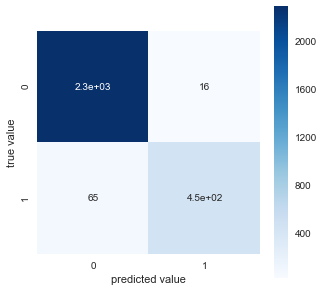

In [55]:
mat = confusion_matrix(y_test, y_svc_lin_predict)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [84]:
report_table = report_table + [['LinearSVC', 'C = 10, loss = squared_hinge, max_iter = 100', grid_search_lsvc.score(X_train, y_train), grid_search_lsvc.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test),np.mean(grid_search_lsvc.cv_results_['mean_train_score']),np.mean(grid_search_lsvc.cv_results_['mean_test_score'])]]

###### kernel svc

In [56]:
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [57]:
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, return_train_score=True,scoring='roc_auc')

In [58]:
grid_search_svc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [61]:
print("Best parameters: {}".format(grid_search_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svc.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.99


In [62]:
y_grid_search_svc_train = grid_search_svc.predict(X_train)
y_grid_search_svc = grid_search_svc.predict(X_test)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_grid_search_svc_train, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_grid_search_svc, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


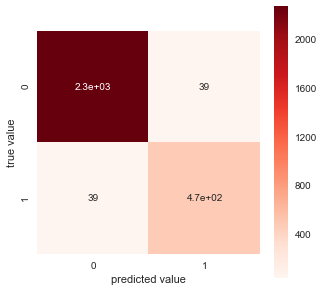

In [65]:
mat = confusion_matrix(y_test, y_grid_search_svc)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [87]:
report_table = report_table + [['SVC', 'C = 100 , gamma = 0.1', grid_search_svc.score(X_train, y_train), grid_search_svc.score(X_test, y_test), roc_auc_score(y_grid_search_svc_train, y_train), roc_auc_score(y_grid_search_svc, y_test),np.mean(grid_search_svc.cv_results_['mean_train_score']),np.mean(grid_search_svc.cv_results_['mean_test_score'])]]

In [89]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score','Mean train score','Mean test score'])

In [90]:
report=report.set_index('Model name')

###### The below report table displays the best parameters for different classification models along with their accuracy and roc_auc scores for both train and test datasets. Since this is a biased dataset, we are considering the roc_auc scores to evaluate the best model.

In [91]:
report

,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score,Mean train score,Mean test score
Model name,,,,,,,
knn,k = 50,0.989546,0.991798,0.943603,0.944273,0.991477,0.980134
Logistic Regression,"C = 10, penalty = l1",0.990535,0.994111,0.954260,0.957525,0.927174,0.926798
Decision Tree,"criterion= entropy, max_depth= 8, max_features...",0.978115,0.982129,0.923767,0.927881,0.951172,0.949037
LinearSVC,"C = 10, loss = squared_hinge, max_iter = 100",0.989505,0.993920,0.956518,0.968935,0.982868,0.982561
SVC,"C = 100 , gamma = 0.1",0.989423,0.991969,0.951753,0.953517,0.981995,0.978634


###### Based on the roc_auc scores above, we find that the train and test score is closest for knn. Thus we determine knn to be the best classification model for this dataset. We run this model below with the selected best parameters

###### knn with best parameters

In [94]:
knn = KNeighborsClassifier(50)
knn.fit(X_train_full, y_train_full)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [95]:
y_pred_knn = knn.predict(X_test_full)
accuracy_score(y_test_full, y_pred_knn)

0.9631156278871438

In [96]:
roc_auc_score(y_test_full, y_pred_knn)

0.9310517223698778

In [97]:
scores = cross_val_score(knn, X_train_full, y_train_full, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96371147 0.96397637 0.96535335 0.96397637 0.96579602]


In [98]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


In [100]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train_full, y_train_full)
pred_most_frequent = dummy_majority.predict(X_test_full)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test_full, y_test_full)))

Unique predicted labels: [0.]
Test score: 0.80


In [101]:
dummy = DummyClassifier().fit(X_train_full, y_train_full)
pred_dummy = dummy.predict(X_test_full)
print("dummy score: {:.2f}".format(dummy.score(X_test_full, y_test_full)))

dummy score: 0.68


In [102]:
confusion = confusion_matrix(y_test_full, y_pred_knn)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[22185   353]
 [  685  4919]]


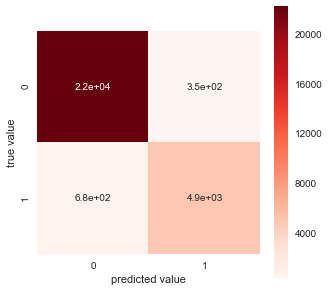

In [103]:
mat = confusion_matrix(y_test_full, y_pred_knn)
plt.subplots(figsize = (5,5))
sns.heatmap(mat, square=True, annot=True, cbar=True , cmap = 'Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [104]:
print("Most frequent class:")
print(confusion_matrix(y_test_full, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test_full, pred_dummy))
print("\nLogistic Regression")
print(confusion_matrix(y_test_full, y_pred_knn))

Most frequent class:
[[22538     0]
 [ 5604     0]]

Dummy model:
[[18104  4434]
 [ 4489  1115]]

Logistic Regression
[[22185   353]
 [  685  4919]]


In [105]:
print("f1 score most frequent: {:.2f}".format(f1_score(y_test_full, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test_full, pred_dummy)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test_full, y_pred_knn)))

f1 score most frequent: 0.00
f1 score dummy: 0.20
f1 score logistic regression: 0.90


C:\Users\sarkara7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
print(classification_report(y_test_full, pred_most_frequent, target_names=["not buzz", "buzz"]))

             precision    recall  f1-score   support

   not buzz       0.80      1.00      0.89     22538
       buzz       0.00      0.00      0.00      5604

avg / total       0.64      0.80      0.71     28142



C:\Users\sarkara7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###### precision-recall curve

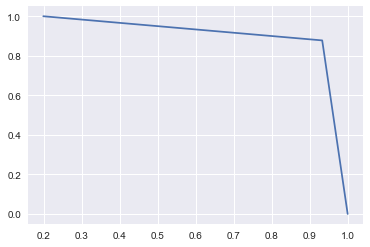

In [108]:
precision, recall, thresholds = precision_recall_curve(y_test_full, y_pred_knn)
plt.plot(precision, recall, label="Precision Recall Curve")

###### roc curve

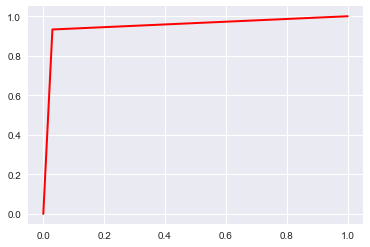

In [109]:
fpr, tpr,_=roc_curve(y_pred_knn,y_test_full,drop_intermediate=False)
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')